![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [385]:
# Start your code here!
import pandas as pd

## Exploratory Data Analysis

In [386]:
mens_results = pd.read_csv("men_results.csv")
womens_results = pd.read_csv("women_results.csv")

mens_results.info()
womens_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3)

In [387]:
mens_results["tournament"].value_counts()

Friendly                                17519
FIFA World Cup qualification             7878
UEFA Euro qualification                  2585
African Cup of Nations qualification     1932
FIFA World Cup                            964
                                        ...  
Real Madrid 75th Anniversary Cup            1
Évence Coppée Trophy                        1
Copa Confraternidad                         1
TIFOCO Tournament                           1
FIFA 75th Anniversary Cup                   1
Name: tournament, Length: 141, dtype: int64

In [388]:
womens_results["tournament"].value_counts()

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

In [389]:
mens_results["date"] = pd.to_datetime(mens_results["date"])
mens_FIFA = mens_results[(mens_results["date"] > "2002-01-01") & (mens_results["tournament"] == "FIFA World Cup")]
mens_FIFA["total_scores"] = mens_FIFA["home_score"] + mens_FIFA["away_score"] 
mens_FIFA.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_scores
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [390]:
womens_results["date"] = pd.to_datetime(womens_results["date"])
womens_FIFA = womens_results[(womens_results["date"] > "2002-01-01") & (womens_results["tournament"] == "FIFA World Cup")]
womens_FIFA["total_scores"] = womens_FIFA["home_score"] + womens_FIFA["away_score"] 
womens_FIFA.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_scores
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


## Checking sample size

In [391]:
men_data = mens_FIFA.pivot(columns="tournament", values="total_scores")
men_data.head()

tournament,FIFA World Cup
25164,1
25165,8
25166,2
25167,3
25168,1


In [392]:
women_data = womens_FIFA.pivot(columns="tournament", values="total_scores")
women_data.head()

tournament,FIFA World Cup
1600,3
1601,2
1602,5
1603,6
1604,4


## Checking normal distribution

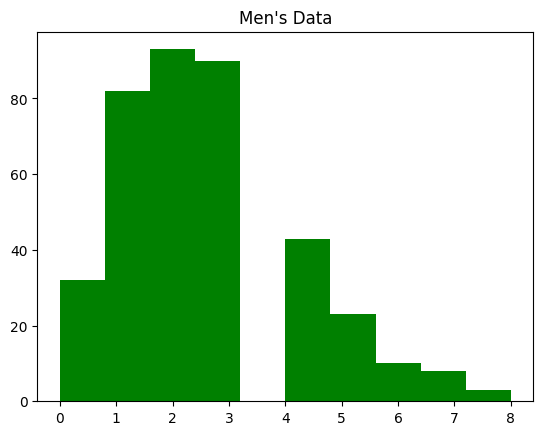

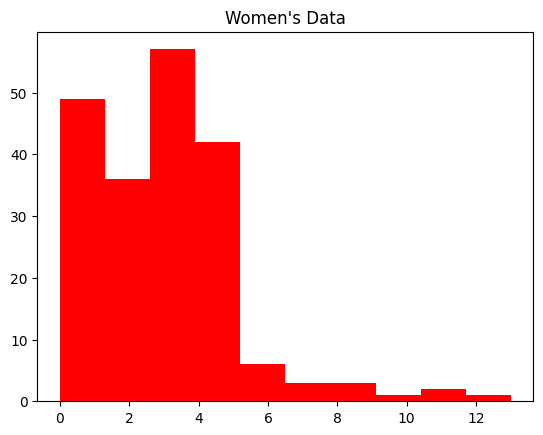

In [393]:
# Determining if the data is normally distributed
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting histogram for men_data
plt.hist(men_data, color='green')
plt.title("Men's Data")
plt.show()  # Show the plot for men's data

# Plotting histogram for women_data
plt.hist(women_data, color='red')
plt.title("Women's Data") 
plt.show()  # Show the plot for women's data

In [394]:
mens_FIFA["group"] = "men"
womens_FIFA["group"] = "women"
combined = pd.concat([mens_FIFA, womens_FIFA], axis=0, ignore_index=True)
#combined.head(50)

grouped = combined[["group","total_scores"]]
#grouped.head() 

#import numpy as np
pivot = grouped.pivot(columns="group", values="total_scores")
#pivot.replace(np.nan,0, inplace=True)
pivot.head()

group,men,women
0,1.0,NaN
1,8.0,NaN
2,2.0,NaN
3,3.0,NaN
4,1.0,NaN


## Performing the hypothesis test

In [395]:
# using the Wilcoxon-Mann-Whitney test
import pingouin

alpha=0.01
mwu = pingouin.mwu(x=pivot["women"],
                   y=pivot["men"],
                   alternative="greater")
print(mwu)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [396]:
p_val = round(mwu["p-val"].values[0], 4)
result = "reject"

# Perform the hypothesis test based on the significance level. 
if p_val <= 0.1:
    result = "reject"
else:
    result = "fail to reject"

# Store a pair of p-values and decisions in a dictionary
result_dict = {"p_val": p_val, "result": result}
